<a href="https://colab.research.google.com/github/simonlim563/asl-ml-immersion/blob/master/Social_sol/Social_Reach_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


| Metric                            | Meta             | TikTok           |
| --------------------------------- | ---------------- | ---------------- |
| `Platform_Unique_Reach`           | ✅                | ✅                |
| `Estimated_Total_Reach`           | ✅                | ✅                |
| `Impressions`                     | ✅                | ✅                |
| `Spend`                           | ✅                | ✅                |
| `Frequency`                       | (can be derived) | (can be derived) |
| `CPM` (Cost per 1000 impressions) | (can be derived) | (can be derived) |
| `Estimated Overlap`               | ❓                | ❓                |
| `Saturation percentage`           | (can be derived) | (can be derived) |
| `Cost per incremental reach`           | (can be derived) | (can be derived) |

In [2]:
# ----- INPUT PARAMETERS -----

# Total budget in $ (can simulate multiple values)
total_budget = 100000

# CPMs (cost per 1,000 impressions) or modeled cost per unique reach
cpm_meta = 5.0     # example: $5
cpm_tiktok = 4.0   # example: $4

# Reach efficiency = users per $1 (inverse of CPM)
reach_per_dollar_meta = 1000 / cpm_meta
reach_per_dollar_tiktok = 1000 / cpm_tiktok

# Overlap assumption: percent of audience that sees both if equally targeted
# E.g., 25% overlap = 0.25
overlap_rate = 0.25

# Allocation splits (0% to Meta, 100% to Meta)
splits = np.arange(0, 1.01, 0.05)  # 0%, 5%, ..., 100%

In [3]:
# ----- SIMULATION FUNCTION -----

results = []

for split in splits:
    budget_meta = total_budget * split
    budget_tiktok = total_budget * (1 - split)

    reach_meta = budget_meta * reach_per_dollar_meta
    reach_tiktok = budget_tiktok * reach_per_dollar_tiktok

    # Estimated overlap (simplified)
    overlap = min(reach_meta, reach_tiktok) * overlap_rate

    deduplicated_reach = reach_meta + reach_tiktok - overlap

    results.append({
        'Meta %': round(split * 100),
        'Meta Spend ($)': budget_meta,
        'TikTok Spend ($)': budget_tiktok,
        'Reach Meta': reach_meta,
        'Reach TikTok': reach_tiktok,
        'Overlap Est.': overlap,
        'Deduplicated Reach': deduplicated_reach
    })

    Meta %  Deduplicated Reach
0        0          25000000.0
1        5          24500000.0
2       10          24000000.0
3       15          23500000.0
4       20          23000000.0
5       25          22500000.0
6       30          22000000.0
7       35          21500000.0
8       40          21000000.0
9       45          20500000.0
10      50          20000000.0
11      55          19500000.0
12      60          19500000.0
13      65          19562500.0
14      70          19625000.0
15      75          19687500.0
16      80          19750000.0
17      85          19812500.0
18      90          19875000.0
19      95          19937500.0
20     100          20000000.0


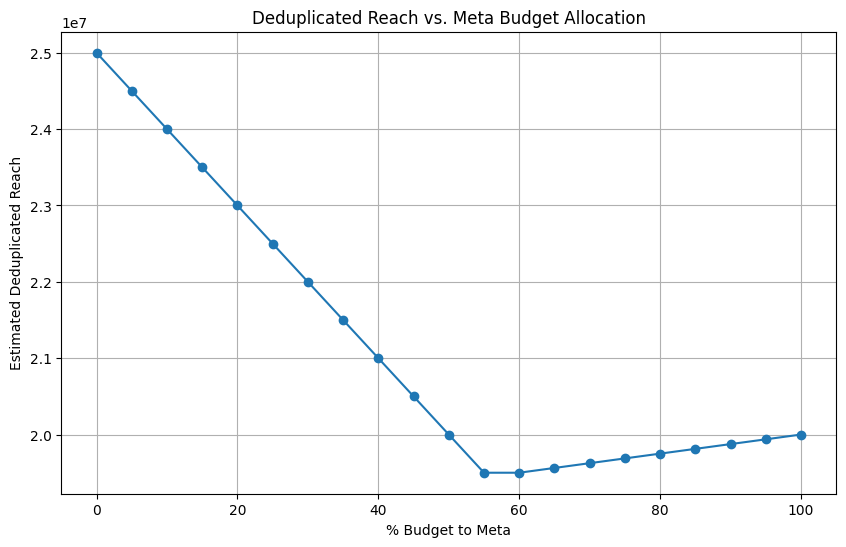

In [4]:
# Convert to DataFrame
df = pd.DataFrame(results)

# ----- OUTPUT: Print + Plot -----

print(df[['Meta %', 'Deduplicated Reach']])

plt.figure(figsize=(10,6))
plt.plot(df['Meta %'], df['Deduplicated Reach'], marker='o')
plt.title('Deduplicated Reach vs. Meta Budget Allocation')
plt.xlabel('% Budget to Meta')
plt.ylabel('Estimated Deduplicated Reach')
plt.grid(True)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----- INPUT PARAMETERS -----

total_budget = 100000  # Total budget in $
overlap_rate = 0.25    # Assumed audience overlap rate between platforms

# Modeled saturation parameters using logarithmic growth (diminishing returns)
# These parameters represent "maximum possible unique reach" per platform
max_reach_meta = 4000000
max_reach_tiktok = 3500000

# Efficiency scaling (how fast spend reaches saturation)
efficiency_meta = 0.00005
efficiency_tiktok = 0.00007

# Allocation splits (0% to Meta, 100% to Meta)
splits = np.arange(0, 1.01, 0.05)

# ----- SIMULATION FUNCTION -----

def reach_with_diminishing_returns(budget, max_reach, efficiency):
    """
    Saturation model using logarithmic growth function
    """
    return max_reach * (1 - np.exp(-efficiency * budget))

results = []

for split in splits:
    budget_meta = total_budget * split
    budget_tiktok = total_budget * (1 - split)

    reach_meta = reach_with_diminishing_returns(budget_meta, max_reach_meta, efficiency_meta)
    reach_tiktok = reach_with_diminishing_returns(budget_tiktok, max_reach_tiktok, efficiency_tiktok)

    # Estimated overlap: proportional to minimum of both reaches
    overlap = min(reach_meta, reach_tiktok) * overlap_rate

    deduplicated_reach = reach_meta + reach_tiktok - overlap

    results.append({
        'Meta %': round(split * 100),
        'Meta Spend ($)': budget_meta,
        'TikTok Spend ($)': budget_tiktok,
        'Reach Meta': reach_meta,
        'Reach TikTok': reach_tiktok,
        'Overlap Est.': overlap,
        'Deduplicated Reach': deduplicated_reach
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# ----- OUTPUT: Print + Plot -----

df[['Meta %', 'Deduplicated Reach']].head(), df[df['Deduplicated Reach'] == df['Deduplicated Reach'].max()]


(   Meta %  Deduplicated Reach
 0       0        3.496808e+06
 1       5        4.159069e+06
 2      10        4.673981e+06
 3      15        5.073780e+06
 4      20        5.383419e+06,
     Meta %  Meta Spend ($)  TikTok Spend ($)    Reach Meta  Reach TikTok  \
 12      60         60000.0           40000.0  3.800852e+06  3.287165e+06   
 
      Overlap Est.  Deduplicated Reach  
 12  821791.195203        6.266225e+06  )